<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Pie Charts**


Estimated time needed: **30** minutes


- In this lab, you will focus on visualizing data.

- The provided dataset will be loaded into pandas for analysis.

- Various pie charts will be created to:
   - Analyze developer preferences.
  
   - Identify technology usage trends.
    
- The lab aims to provide insights into key variables using visual representations.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [5]:
!pip install seaborn

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



In [7]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()

--2025-01-25 13:05:05--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  56.8MB/s    in 2.7s    

2025-01-25 13:05:08 (56.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Composition with Pie Charts


##### 1.1 Create a Pie Chart of the Top 5 Databases Respondents Want to Work With


In the survey data, the `DatabaseWantToWorkWith` column lists the databases that respondents wish to work with. Let’s visualize the top 5 most-desired databases in a pie chart.



/tmp/ipykernel_5608/2256820418.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_databases['PrimaryDatabase'] = df_cleaned_databases['DatabaseWantToWorkWith'].str.split(';').str[0]


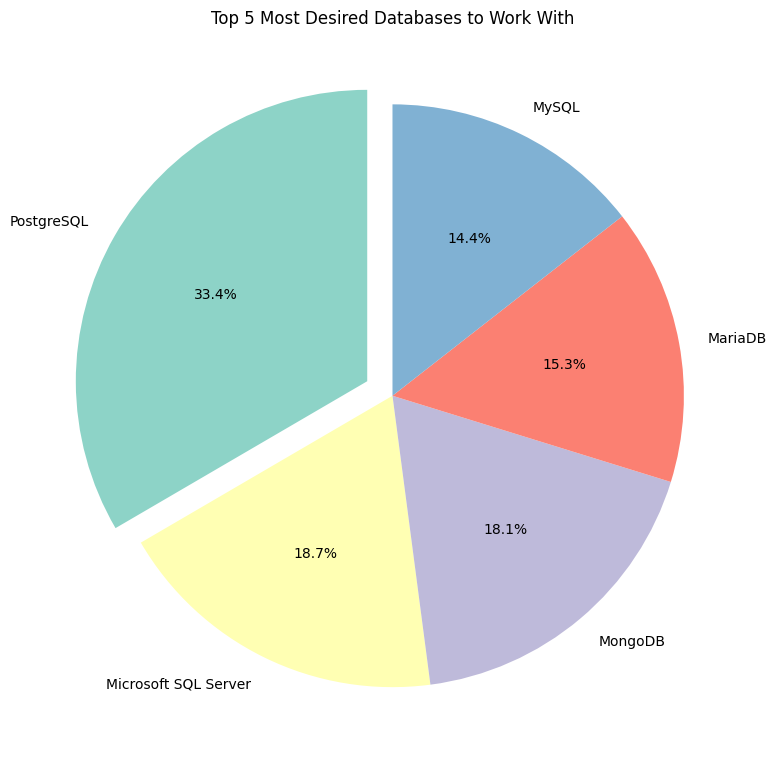

In [9]:
##Write your code here
# Clean the data by removing NaN values in the relevant columns
df_cleaned_databases = df.dropna(subset=['DatabaseWantToWorkWith'])

# Extract the first database in the 'DatabaseWantToWorkWith' column
df_cleaned_databases['PrimaryDatabase'] = df_cleaned_databases['DatabaseWantToWorkWith'].str.split(';').str[0]

# Count the frequency of each database
database_counts = df_cleaned_databases['PrimaryDatabase'].value_counts().reset_index()
database_counts.columns = ['Database', 'Frequency']

# Get the top 5 most-desired databases
top_5_databases = database_counts.head(5)

# Exploding the largest slice (highest frequency)
explode = [0.1 if i == top_5_databases['Frequency'].idxmax() else 0 for i in range(len(top_5_databases))]

# Create a pie chart of the top 5 databases
plt.figure(figsize=(8, 8))
plt.pie(top_5_databases['Frequency'], 
        labels=top_5_databases['Database'], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette('Set3', len(top_5_databases)),
        explode=explode)

# Title of the pie chart
plt.title('Top 5 Most Desired Databases to Work With')

# Show the plot
plt.tight_layout()
plt.show()

The `DevType` column lists the developer types for respondents. We’ll examine the distribution by showing the top 5 developer roles in a pie chart.



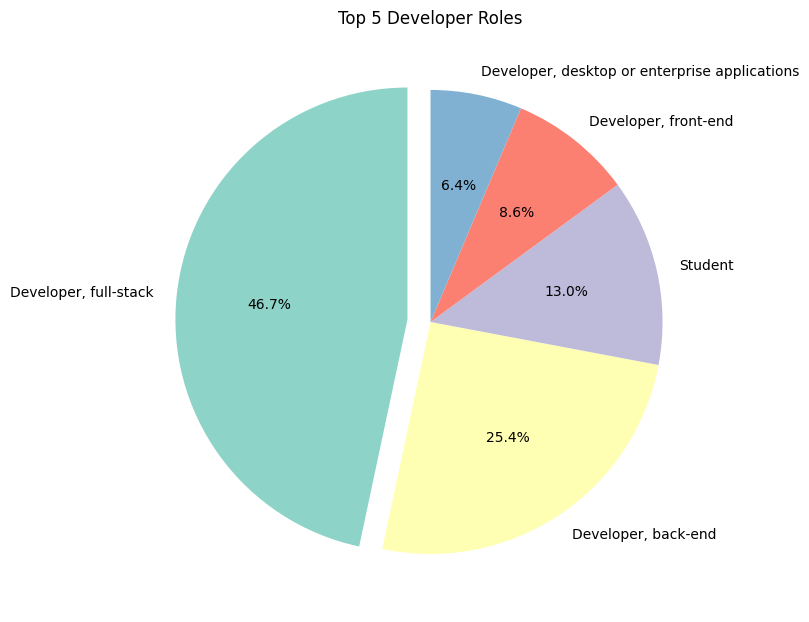

In [10]:
##Write your code here

# Clean the data by removing NaN values in the relevant columns
df_cleaned_devtypes = df.dropna(subset=['DevType'])

# Count the frequency of each developer type
devtype_counts = df_cleaned_devtypes['DevType'].value_counts().reset_index()
devtype_counts.columns = ['Developer Role', 'Frequency']

# Get the top 5 most frequent developer roles
top_5_devtypes = devtype_counts.head(5)

# Exploding the largest slice (highest frequency)
explode = [0.1 if i == top_5_devtypes['Frequency'].idxmax() else 0 for i in range(len(top_5_devtypes))]

# Create a pie chart of the top 5 developer roles
plt.figure(figsize=(8, 8))
plt.pie(top_5_devtypes['Frequency'], 
        labels=top_5_devtypes['Developer Role'], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette('Set3', len(top_5_devtypes)),
        explode=explode)

# Title of the pie chart
plt.title('Top 5 Developer Roles')

# Show the plot
plt.tight_layout()
plt.show()

##### 1.3 Create a pie chart for the operating systems used by respondents for professional use


The `OpSysProfessional` use column shows the operating systems developers use professionally. Let’s visualize the distribution of the top operating systems in a pie chart.



/tmp/ipykernel_5608/4162061141.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_opsys['PrimaryOpSys'] = df_cleaned_opsys['OpSysProfessional use'].str.split(';').str[0]


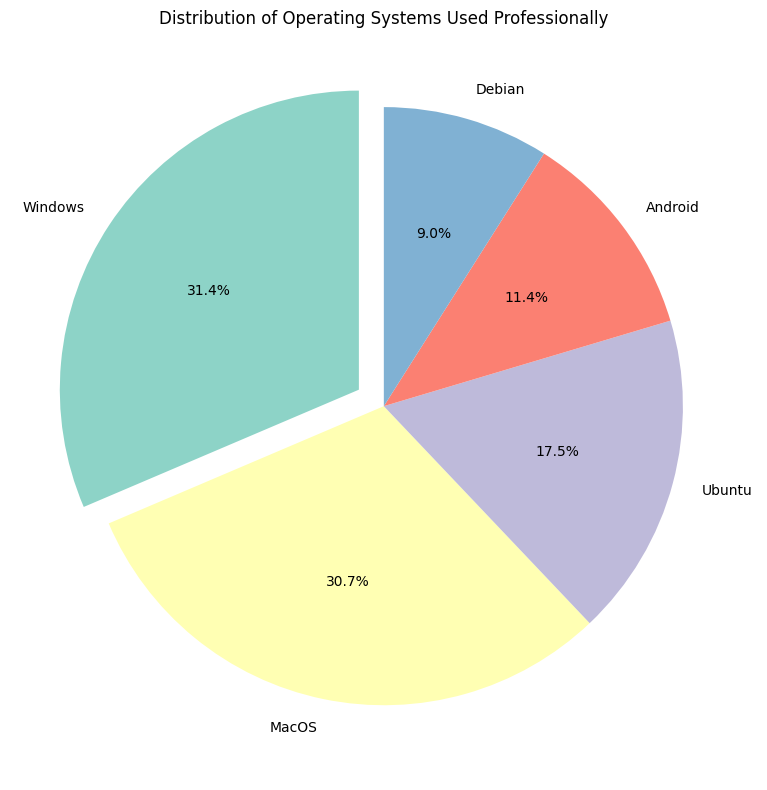

In [17]:
##Write your code here

# Clean the data by removing NaN values in the relevant columns
df_cleaned_opsys = df.dropna(subset=['OpSysProfessional use'])

# Extract the first operating system from the 'OpSysProfessionalUse' column (before the semicolon)
df_cleaned_opsys['PrimaryOpSys'] = df_cleaned_opsys['OpSysProfessional use'].str.split(';').str[0]

# Count the frequency of each operating system
opsys_counts = df_cleaned_opsys['PrimaryOpSys'].value_counts().reset_index()
opsys_counts.columns = ['Operating System', 'Frequency']

# Get the top operating systems
top_opsys = opsys_counts.head(5)

# Exploding the largest slice (highest frequency)
explode = [0.1 if i == top_opsys['Frequency'].idxmax() else 0 for i in range(len(top_opsys))]

# Create a pie chart of operating systems
plt.figure(figsize=(8, 8))
plt.pie(top_opsys['Frequency'], 
        labels=top_opsys['Operating System'], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette('Set3', len(top_opsys)),
        explode=explode)

# Title of the pie chart
plt.title('Distribution of Operating Systems Used Professionally')

# Show the plot
plt.tight_layout()
plt.show()

### Task 2: Additional Visualizations and Comparisons


##### 2.1 Pie Chart for Top 5 Programming Languages Respondents Have Worked With


The `LanguageHaveWorkedWith` column contains the programming languages that respondents have experience with. We’ll plot a pie chart to display the composition of the top 5 languages.



/tmp/ipykernel_5608/861620481.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_languages['PrimaryLanguage'] = df_cleaned_languages['LanguageHaveWorkedWith'].str.split(';').str[0]


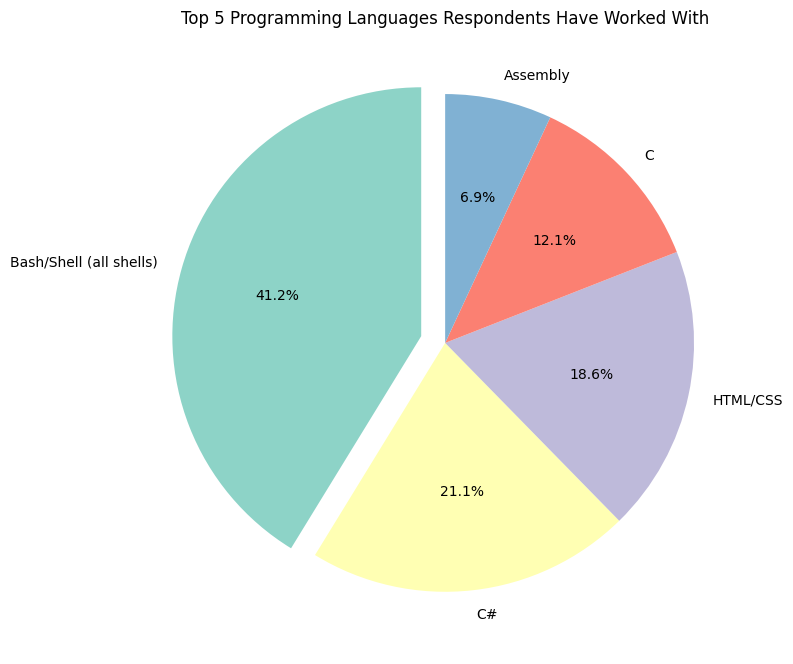

In [16]:
##Write your code here

# Clean the data by removing NaN values in the relevant columns
df_cleaned_languages = df.dropna(subset=['LanguageHaveWorkedWith'])

# Extract the first programming language from the 'LanguageHaveWorkedWith' column (before the semicolon)
df_cleaned_languages['PrimaryLanguage'] = df_cleaned_languages['LanguageHaveWorkedWith'].str.split(';').str[0]

# Count the frequency of each programming language
language_counts = df_cleaned_languages['PrimaryLanguage'].value_counts().reset_index()
language_counts.columns = ['Programming Language', 'Frequency']

# Get the top 5 programming languages
top_languages = language_counts.head(5)  # Top 5 programming languages

# Exploding the largest slice (highest frequency)
explode = [0.1 if i == top_languages['Frequency'].idxmax() else 0 for i in range(len(top_languages))]

# Create a pie chart of programming languages
plt.figure(figsize=(8, 8))
plt.pie(top_languages['Frequency'], 
        labels=top_languages['Programming Language'], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette('Set3', len(top_languages)),
        explode=explode)

# Title of the pie chart
plt.title('Top 5 Programming Languages Respondents Have Worked With')

# Show the plot
plt.tight_layout()
plt.show()

##### 2.2 Pie Chart for Top Collaboration Tools used in Professional Use


Using the `NEWCollabToolsHaveWorkedWith` column, we’ll identify and visualize the top collaboration tools respondents use in their professional work.



/tmp/ipykernel_5608/1661523727.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_collab_tools['PrimaryCollabTool'] = df_cleaned_collab_tools['NEWCollabToolsHaveWorkedWith'].str.split(';').str[0]


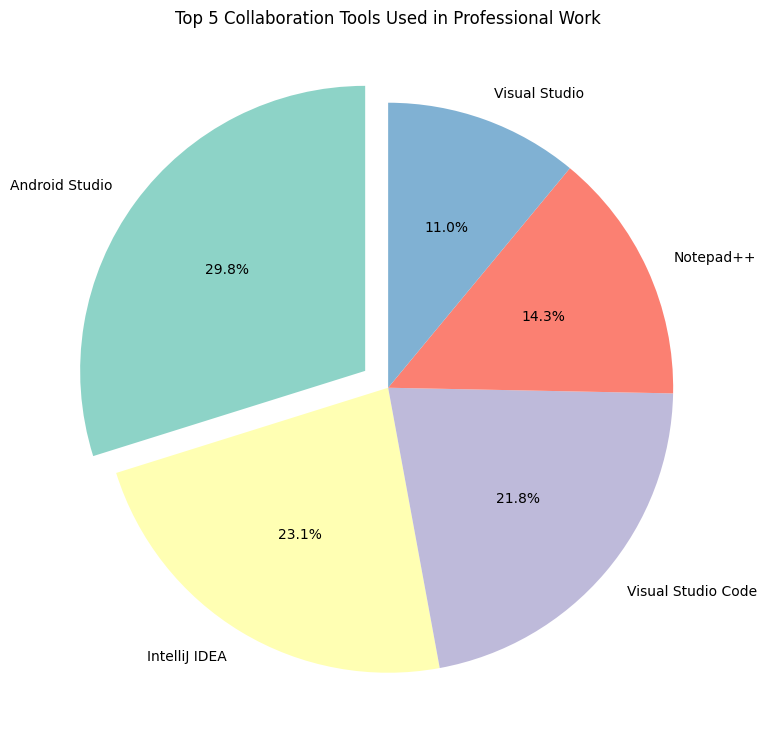

In [18]:
##Write your code here

# Clean the data by removing NaN values in the relevant columns
df_cleaned_collab_tools = df.dropna(subset=['NEWCollabToolsHaveWorkedWith'])

# Extract the first collaboration tool used from the 'NEWCollabToolsHaveWorkedWith' column (before the semicolon)
df_cleaned_collab_tools['PrimaryCollabTool'] = df_cleaned_collab_tools['NEWCollabToolsHaveWorkedWith'].str.split(';').str[0]

# Count the frequency of each collaboration tool
collab_tool_counts = df_cleaned_collab_tools['PrimaryCollabTool'].value_counts().reset_index()
collab_tool_counts.columns = ['Collaboration Tool', 'Frequency']

# Get the top 5 collaboration tools
top_collab_tools = collab_tool_counts.head(5)  # Top 5 collaboration tools

# Exploding the largest slice (highest frequency)
explode = [0.1 if i == top_collab_tools['Frequency'].idxmax() else 0 for i in range(len(top_collab_tools))]

# Create a pie chart of the collaboration tools used
plt.figure(figsize=(8, 8))
plt.pie(top_collab_tools['Frequency'], 
        labels=top_collab_tools['Collaboration Tool'], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette('Set3', len(top_collab_tools)),
        explode=explode)

# Title of the pie chart
plt.title('Top 5 Collaboration Tools Used in Professional Work')

# Show the plot
plt.tight_layout()
plt.show()

### Task 3: Analyzing and Interpreting Composition


In this task, you will create additional pie charts to analyze specific aspects of the survey data. Use `pandas` and `matplotlib` to complete each task and interpret the findings.



##### 3.1 Pie Chart of `Respondents` Most Admired Programming Languages


The `LanguageAdmired` column lists the programming languages respondents admire most. Create a pie chart to visualize the top 5 admired languages.



/tmp/ipykernel_5608/3173624744.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_admired_languages['PrimaryAdmiredLanguage'] = df_cleaned_admired_languages['LanguageAdmired'].str.split(';').str[0]


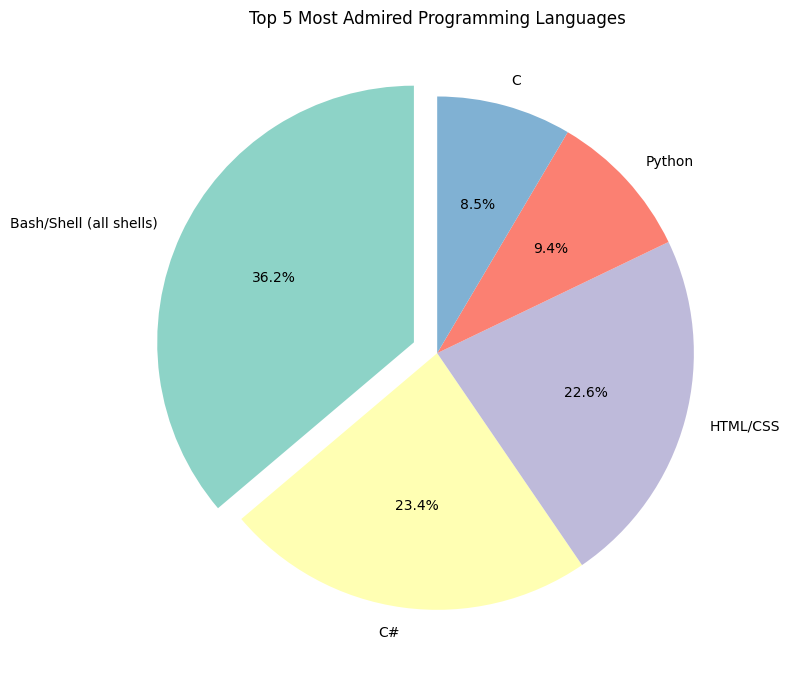

In [19]:
##Write your code here

# Clean the data by removing NaN values in the relevant column
df_cleaned_admired_languages = df.dropna(subset=['LanguageAdmired'])

# Extract the first admired programming language from the 'LanguageAdmired' column (before the semicolon)
df_cleaned_admired_languages['PrimaryAdmiredLanguage'] = df_cleaned_admired_languages['LanguageAdmired'].str.split(';').str[0]

# Count the frequency of each admired programming language
admired_language_counts = df_cleaned_admired_languages['PrimaryAdmiredLanguage'].value_counts().reset_index()
admired_language_counts.columns = ['Admired Language', 'Frequency']

# Get the top 5 admired languages
top_admired_languages = admired_language_counts.head(5)  # Top 5 admired languages

# Exploding the largest slice (highest frequency)
explode = [0.1 if i == top_admired_languages['Frequency'].idxmax() else 0 for i in range(len(top_admired_languages))]

# Create a pie chart of the admired programming languages
plt.figure(figsize=(8, 8))
plt.pie(top_admired_languages['Frequency'], 
        labels=top_admired_languages['Admired Language'], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette('Set3', len(top_admired_languages)),
        explode=explode)

# Title of the pie chart
plt.title('Top 5 Most Admired Programming Languages')

# Show the plot
plt.tight_layout()
plt.show()

##### 3.2 Pie Chart of Tools Used for AI Development


Using the `AIToolCurrently` Using column, create a pie chart to visualize the top 5 tools developers are currently using for AI development.



/tmp/ipykernel_5608/3227035517.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_ai_tools['PrimaryAITool'] = df_cleaned_ai_tools['AIToolCurrently Using'].str.split(';').str[0]


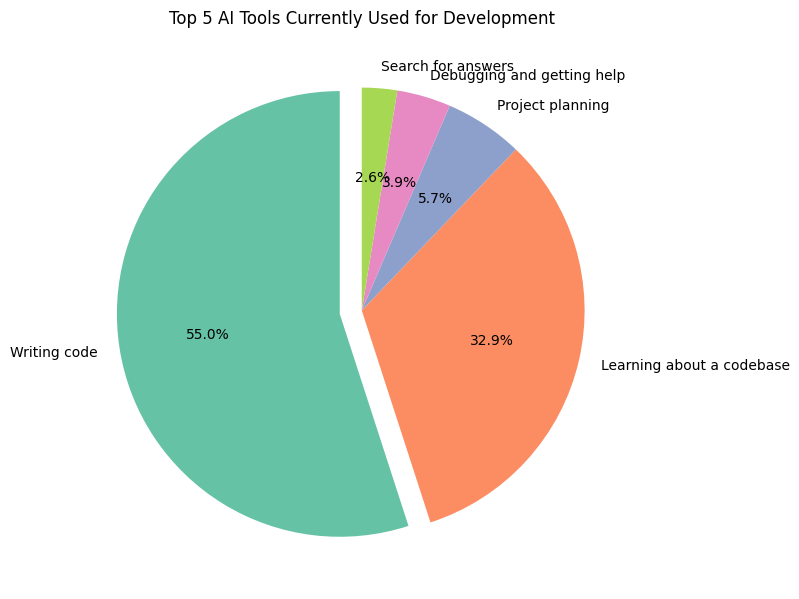

In [21]:
##Write your code here

# Clean the data by removing NaN values in the relevant column
df_cleaned_ai_tools = df.dropna(subset=['AIToolCurrently Using'])

# Extract the first AI tool from the 'AIToolCurrentlyUsing' column (before the semicolon)
df_cleaned_ai_tools['PrimaryAITool'] = df_cleaned_ai_tools['AIToolCurrently Using'].str.split(';').str[0]

# Count the frequency of each AI tool used
ai_tool_counts = df_cleaned_ai_tools['PrimaryAITool'].value_counts().reset_index()
ai_tool_counts.columns = ['AI Tool', 'Frequency']

# Get the top 5 AI tools
top_ai_tools = ai_tool_counts.head(5)  # Top 5 AI tools

# Exploding the largest slice (highest frequency)
explode = [0.1 if i == top_ai_tools['Frequency'].idxmax() else 0 for i in range(len(top_ai_tools))]

# Create a pie chart of the top 5 AI tools
plt.figure(figsize=(8, 8))
plt.pie(top_ai_tools['Frequency'], 
        labels=top_ai_tools['AI Tool'], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette('Set2', len(top_ai_tools)),
        explode=explode)

# Title of the pie chart
plt.title('Top 5 AI Tools Currently Used for Development')

# Show the plot
plt.tight_layout()
plt.show()

##### 3.3 Pie Chart for Preferred Web Frameworks


The `WebframeWantToWorkWith` column includes web frameworks that respondents are interested in working with. Visualize the top 5 frameworks in a pie chart.



/tmp/ipykernel_5608/3144350481.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_web_frameworks['PrimaryWebFramework'] = df_cleaned_web_frameworks['WebframeWantToWorkWith'].str.split(';').str[0]


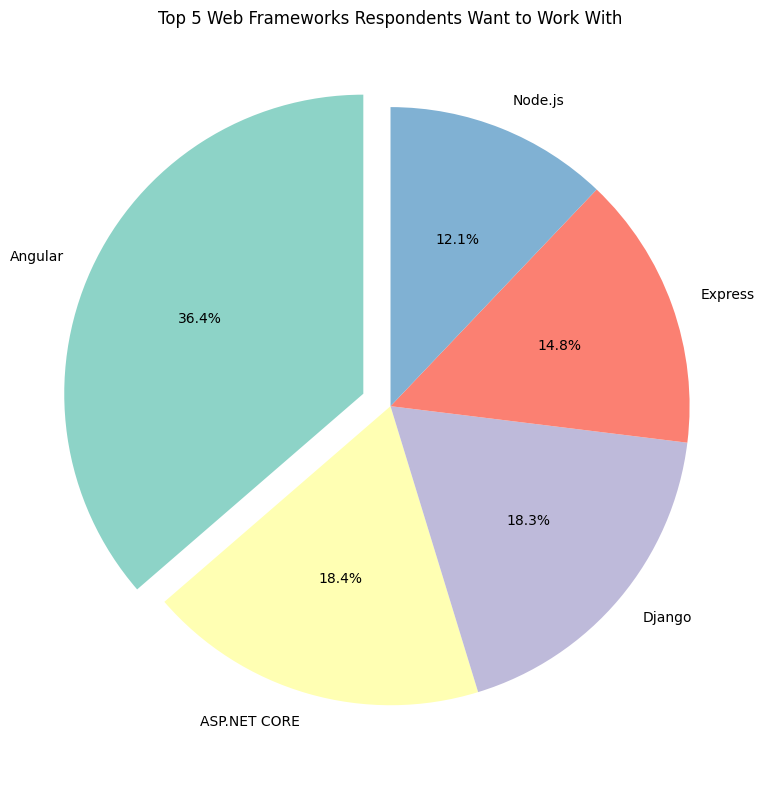

In [22]:
##Write your code here

# Clean the data by removing NaN values in the relevant column
df_cleaned_web_frameworks = df.dropna(subset=['WebframeWantToWorkWith'])

# Extract the first web framework from the 'WebframeWantToWorkWith' column (before the semicolon)
df_cleaned_web_frameworks['PrimaryWebFramework'] = df_cleaned_web_frameworks['WebframeWantToWorkWith'].str.split(';').str[0]

# Count the frequency of each web framework desired
web_framework_counts = df_cleaned_web_frameworks['PrimaryWebFramework'].value_counts().reset_index()
web_framework_counts.columns = ['Web Framework', 'Frequency']

# Get the top 5 web frameworks
top_web_frameworks = web_framework_counts.head(5)  # Top 5 web frameworks

# Exploding the largest slice (highest frequency)
explode = [0.1 if i == top_web_frameworks['Frequency'].idxmax() else 0 for i in range(len(top_web_frameworks))]

# Create a pie chart of the top 5 web frameworks
plt.figure(figsize=(8, 8))
plt.pie(top_web_frameworks['Frequency'], 
        labels=top_web_frameworks['Web Framework'], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette('Set3', len(top_web_frameworks)),
        explode=explode)

# Title of the pie chart
plt.title('Top 5 Web Frameworks Respondents Want to Work With')

# Show the plot
plt.tight_layout()
plt.show()

##### 3.4 Pie Chart for Most Desired Embedded Technologies


Using the `EmbeddedWantToWorkWith` column, create a pie chart to show the top 5 most desired embedded technologies that respondents wish to work with.



/tmp/ipykernel_5608/2869213600.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_embedded_technologies['PrimaryEmbeddedTechnology'] = df_cleaned_embedded_technologies['EmbeddedWantToWorkWith'].str.split(';').str[0]


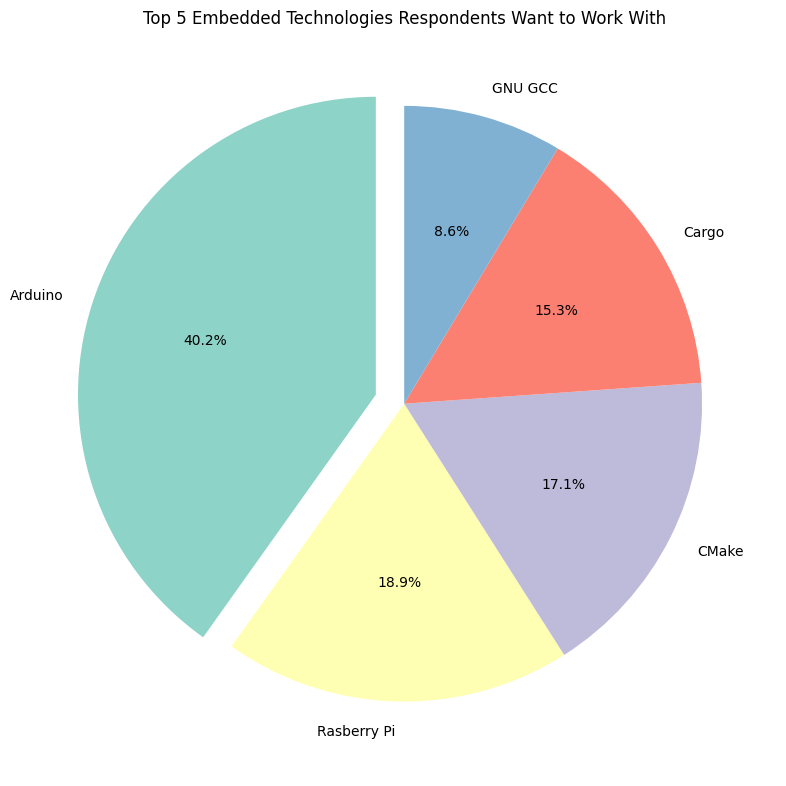

In [23]:
##Write your code here

# Clean the data by removing NaN values in the relevant column
df_cleaned_embedded_technologies = df.dropna(subset=['EmbeddedWantToWorkWith'])

# Extract the first embedded technology from the 'EmbeddedWantToWorkWith' column (before the semicolon)
df_cleaned_embedded_technologies['PrimaryEmbeddedTechnology'] = df_cleaned_embedded_technologies['EmbeddedWantToWorkWith'].str.split(';').str[0]

# Count the frequency of each embedded technology desired
embedded_technology_counts = df_cleaned_embedded_technologies['PrimaryEmbeddedTechnology'].value_counts().reset_index()
embedded_technology_counts.columns = ['Embedded Technology', 'Frequency']

# Get the top 5 embedded technologies
top_embedded_technologies = embedded_technology_counts.head(5)  # Top 5 technologies

# Exploding the largest slice (highest frequency)
explode = [0.1 if i == top_embedded_technologies['Frequency'].idxmax() else 0 for i in range(len(top_embedded_technologies))]

# Create a pie chart of the top 5 embedded technologies
plt.figure(figsize=(8, 8))
plt.pie(top_embedded_technologies['Frequency'], 
        labels=top_embedded_technologies['Embedded Technology'], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette('Set3', len(top_embedded_technologies)),
        explode=explode)

# Title of the pie chart
plt.title('Top 5 Embedded Technologies Respondents Want to Work With')

# Show the plot
plt.tight_layout()
plt.show()

### Summary


After completing this lab, you will be able to:
- Create pie charts to visualize developer preferences across databases, programming languages, AI tools, and cloud platforms.
- Identify trends in technology usage, role distribution, and tool adoption through pie charts.
- Analyze and compare data composition across various categories to gain insights into developer preferences.




## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
